# Конспект по проверке гиппотез

Курс: Проверка гиппотез и анализ данных на Python (https://stepik.org/course/193096)

Хорошая статья с анимацией и графиками: https://habr.com/ru/articles/559062/

## Центральная предельная теорема
Если взять много выборок из генеральной совокупности и посчитать средние значения для каждой выборки, то распределение этих средних будет приближаться к нормальному распределению, независимо от формы исходного распределения.

## 1. T-test

### 1.1. Одновыборочный t-test 

Одновыборочный t-тест используется для проверки гипотезы о среднем значении в генеральной совокупности на основе данных из одной выборки.

Нулевая гипотеза (H₀):    
H0 : μ=u0 (Среднее значение выборки равно предполагаемому среднему значению генеральной совокупности)

Альтернативная гипотеза (H₁):      
H1 : μ≠u0 (Среднее значение выборки не равно предполагаемому среднему значению генеральной совокупности)   

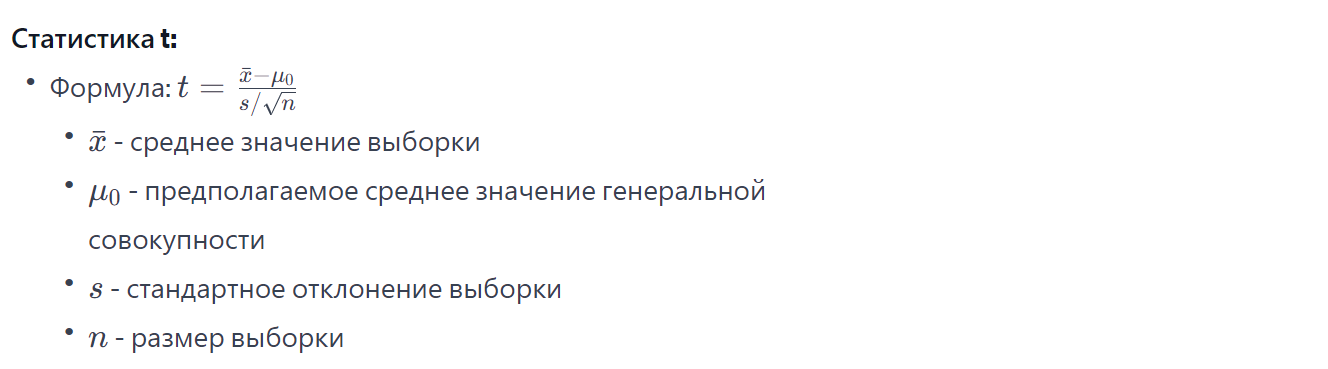

Простейший код для расчета t-статистики по формуле выше:
avg = x_list.mean()       
u0 = 3.5       
s = x_list.std()       
n = len(x_list)        
t = (avg - u0) / (s / n**0.5)      

t-статистика используется для определения того, насколько значимо различие между средним значением выборки и предполагаемым средним значением генеральной совокупности. Распределение t-статистики зависит от размера выборки и имеет форму колоколообразной кривой, подобной нормальному распределению.

Однако форма распределения t-статистики зависит от степеней свободы, которые рассчитываются как n−1, где n - размер выборки. С увеличением степеней свободы распределение t-статистики становится все ближе к стандартному нормальному распределению. При малых размерах выборки распределение t-статистики более пологое и имеет большие хвосты, чем стандартное нормальное распределение.

Критические значения t-статистики определяются из таблиц или с помощью статистических программ на основе уровня значимости и степеней свободы. При сравнении значения t-статистики с критическими значениями можно сделать вывод о статистической значимости различий между выборочным средним и предполагаемым значением среднего в генеральной совокупности.

**Принятие решения:** Если значение t-статистики попадает в критическую область (определенную на основе уровня значимости), то нулевая гипотеза отвергается в пользу альтернативной. Критическое значение определяется на основе выбранного уровня значимости (обычно обозначается как α) и степеней свободы (df), которые зависят от размера выборки.

1. Выбор уровня значимости (α): Уровень значимости обычно выбирается заранее и отражает вероятность совершения ошибки первого рода (отклонение от нулевой гипотезы, когда она на самом деле верна). Например, часто используются уровни значимости 0.05 или 0.01.
2. Определение степеней свободы (df):Для одновыборочного t-теста степени свободы равны n−1, где n - размер выборки.
3. Нахождение критического значения: Критическое значение t-статистики можно найти с помощью таблиц распределения t-статистики или при помощи программ для статистического анализа. Если значение t-статистики, полученное в результате анализа, превышает это критическое значение, то нулевая гипотеза отвергается в пользу альтернативной.

#### Пример 1
Вес популяции женщин известен по исследованию прошлого года и составляет в среднем 65 кг. Новое исследование, проведенное на выборке из 30 женщин, показало средний вес 68 кг. При условии, что стандартное отклонение популяции составляет 10 кг, проверьте, есть ли статистически значимое различие в весе женщин в новом исследовании. Уровень значимости принять равным 5%.

*То есть нам фактически надо убедиться в том, что различие между средним значением выборки и средним всей совокупности является/не является статистически значимым*

In [1]:
u0 = 65
s = 10
n = 30
avg = 68
t = (avg - u0) / (s / n**0.5)
print(t)

1.6431676725154982


In [2]:
# критическое значение t-критерия Стьюдента
from scipy import stats

alfa = 1. - 0.95    # уровень значимости
df = n - 1     # степени свободы

cr =  stats.t.ppf(1. - alfa / 2., df)

print(cr)

2.045229642132703


In [3]:
print('Is not significant' if abs(t) < abs(cr) else 'Is significant')

Is not significant


#### Пример 2
Проверка предположения о равенстве 30 среднего генеральной совокупности 

In [4]:
import scipy.stats as stats

# Некоторые данные (выборка)
data = [25, 30, 28, 35, 34, 28, 30, 32, 28, 29]

# Уровень значимости
alpha = 0.05

# Выполняем одновыборочный t-тест
t_stat, p_value = stats.ttest_1samp(data, 30)  # Предполагаемое среднее генеральной совокупности

# Печатаем результаты
print("t-статистика:", t_stat)
print("p-value:", p_value)

# Проверка статистической значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Среднее не равно 30")
else:
    print("Не можем отвергнуть нулевую гипотезу: Среднее равно 30")

t-статистика: -0.10419430674707963
p-value: 0.9193001605502045
Не можем отвергнуть нулевую гипотезу: Среднее равно 30


#### Пример 2
Компания утверждает, что среднее время доставки их товаров клиентам составляет 4 дня. Вы взяли случайную выборку из 20 заказов и выяснили, что среднее время доставки в этой выборке составляет 3.5 дня, а стандартное отклонение времени доставки 1.2 дня. Можно ли считать утверждение компании верным на уровне значимости 0.05?

In [1]:
u0 = 4
s = 1.2
n = 20
avg = 3.5
t = (avg - u0) / (s / n**0.5)
print(t)
# критическое значение t-критерия Стьюдента
from scipy import stats
alfa = 1. - 0.95    # уровень значимости
df = n - 1     # степени свободы
cr =  stats.t.ppf(1. - alfa / 2., df)
print(cr)
print('Is not significant' if abs(t) < abs(cr) else 'Is significant')

-1.8633899812498251
2.093024054408263
Is not significant


Т.о. да, можно считать утверждение компании верным

### 1.2. Двухвыборочный t-test 

Существует несколько типов двухвыборочных t-тестов   

#### 1.2.1. Независимые выборки (Independent Samples t-test - тест Стьюдента)**

Применяется, когда две выборки являются независимыми (разные группы или условия), и наблюдения в одной выборке не влияют на наблюдения в другой.
Предполагает равенство дисперсий (гомогенность дисперсий) между двумя группами.      

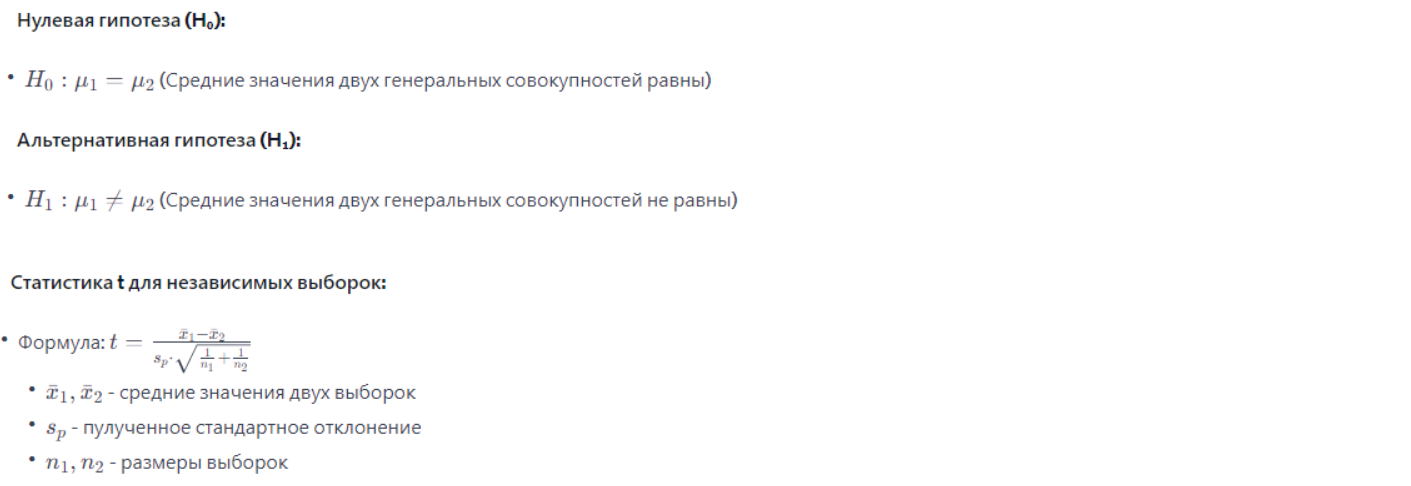

In [5]:
import scipy.stats as stats
# Пример двух выборок
data1 = [84, 91, 78, 88, 75]
data2 = [69, 74, 72, 68, 70]

# Расчет t-статистики и p-value
t_stat, p_value = stats.ttest_ind(data1, data2)

# Вывод результатов
if p_value < 0.05:
    print("Есть статистически значимые различия между средними значениями выборок.")
else:
    print("Нет статистически значимых различий между средними значениями выборок.")

Есть статистически значимые различия между средними значениями выборок.


Значение p-value представляет вероятность получить такие или более экстремальные различия между выборками, если нулевая гипотеза (о равенстве средних) верна. Чем меньше значение p-value, тем сильнее данные свидетельствуют против нулевой гипотезы. Обычно, если p-value меньше выбранного уровня значимости (обычно 0.05), нулевая гипотеза отвергается.

#### 1.2.2. Разноповторные измерения (Paired Samples t-test):

Используется, когда у каждого объекта есть два измерения или значения, например, до и после вмешательства, две разные условия для одних и тех же объектов и т.д.
Предполагает, что различия между парами данных (до и после) имеют нормальное распределение или умеренное отклонение от нормального распределения.     

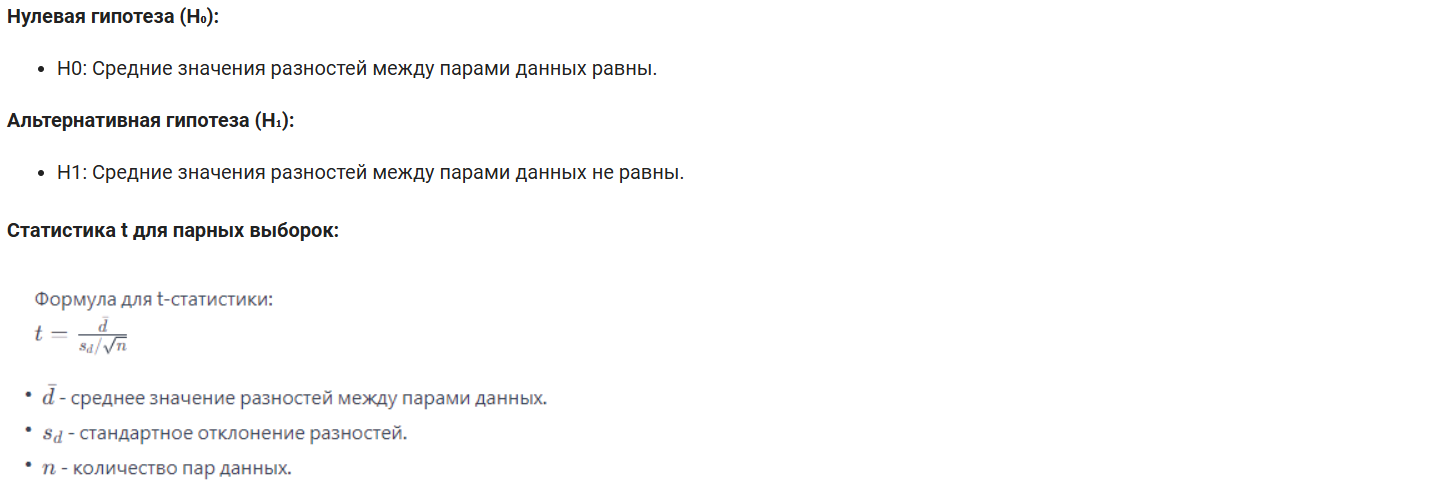

Условия применения:
- Данные должны быть измерены на одних и тех же объектах/единицах до и после воздействия или в различных условиях
- Разности между парами данных должны иметь приблизительно нормальное распределение или умеренное отклонение от нормального распределения

Интерпретация результатов:
- Если значение p-value меньше выбранного уровня значимости (обычно 0.05), то нулевая гипотеза отвергается в пользу альтернативной.
- Если p-value меньше уровня значимости, это указывает на статистически значимое различие между средними значениями парами данных.

In [7]:
import scipy.stats as stats

# Пример парных выборок (до и после)
before = [5, 7, 3, 8, 6]
after = [8, 9, 6, 10, 7]

# Парный t-тест для разноповторных измерений с альтернативной гипотезой
t_stat, p_value = stats.ttest_rel(before, after)
print("t-статистика:", t_stat)
print("p-value:", p_value)

t-статистика: -5.879747322073337
p-value: 0.004181072135640301


Этот тест позволяет оценить, есть ли статистически значимое изменение между двумя связанными выборками и узнать, является ли это изменение случайным или значимым относительно альтернативной гипотезы о неравенстве средних значений парами данных.

#### 1.2.3. t-тест Уэлча (Welch's t-test):**

Используется, когда предположение о равенстве дисперсий в двух группах не выполняется.
Этот тест менее чувствителен к нарушению равенства дисперсий и может быть более надежным в случае неравных или неоднородных дисперсий.

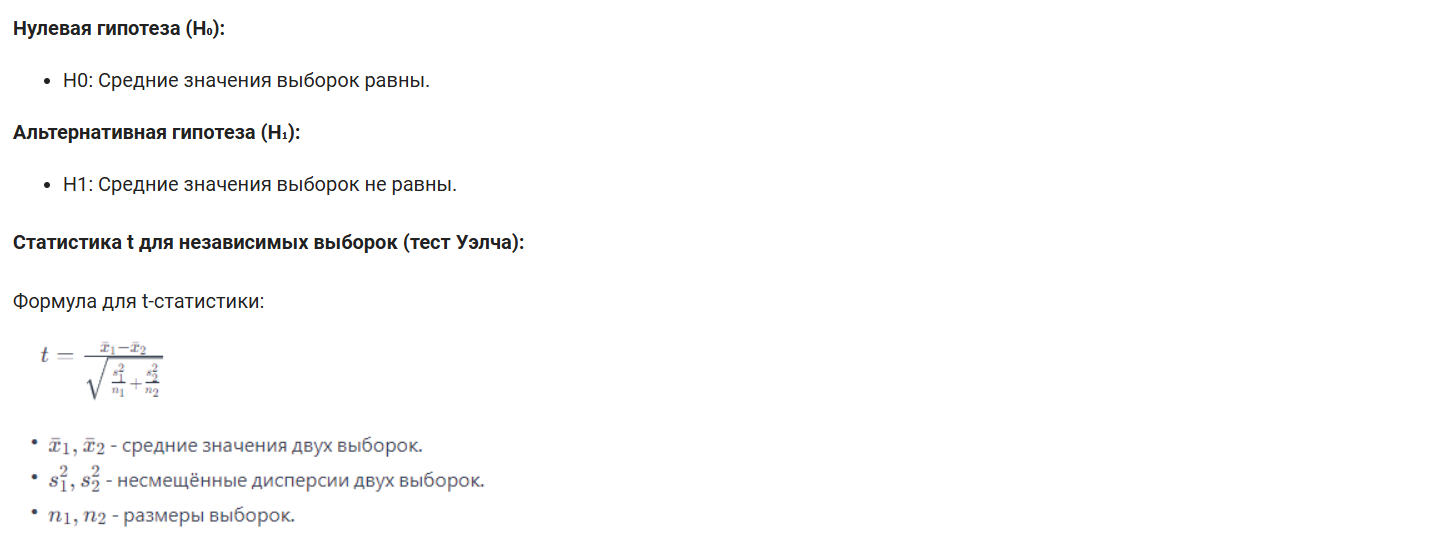

Условия применения:
- Независимые выборки, не связанные между собой.
- Нарушение предположения о равенстве дисперсий между группами.

Интерпретация результатов:
- Если значение p-value меньше выбранного уровня значимости (обычно 0.05), нулевая гипотеза отвергается в пользу альтернативной.
- Если p-value меньше уровня значимости, это указывает на статистически значимое различие между средними значениями выборок.

In [8]:
import scipy.stats as stats

# Пример двух независимых выборок
group1 = [30, 25, 27, 31, 26]
group2 = [33, 28, 30, 29, 32]

# t-тест Уэлча для независимых выборок с разными дисперсиями
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("t-статистика:", t_stat)
print("p-value:", p_value)

t-статистика: -1.7529196424044282
p-value: 0.11949771718914884


Тест Уэлча позволяет оценить наличие статистически значимых различий между двумя независимыми выборками с учётом неравенства дисперсий.